In [27]:
#MORENO, JOHN LESTER S
#ARAGONES, DENNIES
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [2]:
fam = pd.read_csv("datasets//Family_Income_and_Expenditure.csv")

In [3]:
fam.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [4]:
fam.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

In [5]:
fam['Region'] = fam['Region'].astype('category')
fam['Main Source of Income'] = fam['Main Source of Income'].astype('category')
fam['Household Head Sex'] = fam['Household Head Sex'].astype('category')
fam['Household Head Marital Status'] = fam['Household Head Marital Status'].astype('category')
fam['Household Head Highest Grade Completed'] = fam['Household Head Highest Grade Completed'].astype('category')
fam['Household Head Job or Business Indicator'] = fam['Household Head Job or Business Indicator'].astype('category')
fam['Household Head Occupation'] = fam['Household Head Occupation'].astype('category')
fam['Household Head Class of Worker'] = fam['Household Head Class of Worker'].astype('category')
fam['Type of Building/House'] = fam['Type of Building/House'].astype('category')
fam['Type of Household'] = fam['Type of Household'].astype('category')
fam['Type of Roof'] = fam['Type of Roof'].astype('category')
fam['Type of Walls'] = fam['Type of Walls'].astype('category')
fam['Tenure Status'] = fam['Tenure Status'].astype('category')
fam['Toilet Facilities'] = fam['Toilet Facilities'].astype('category')
fam['Main Source of Water Supply'] = fam['Main Source of Water Supply'].astype('category')

<h1>Analysis 1 - How does household income affect food expenditure?</h1>

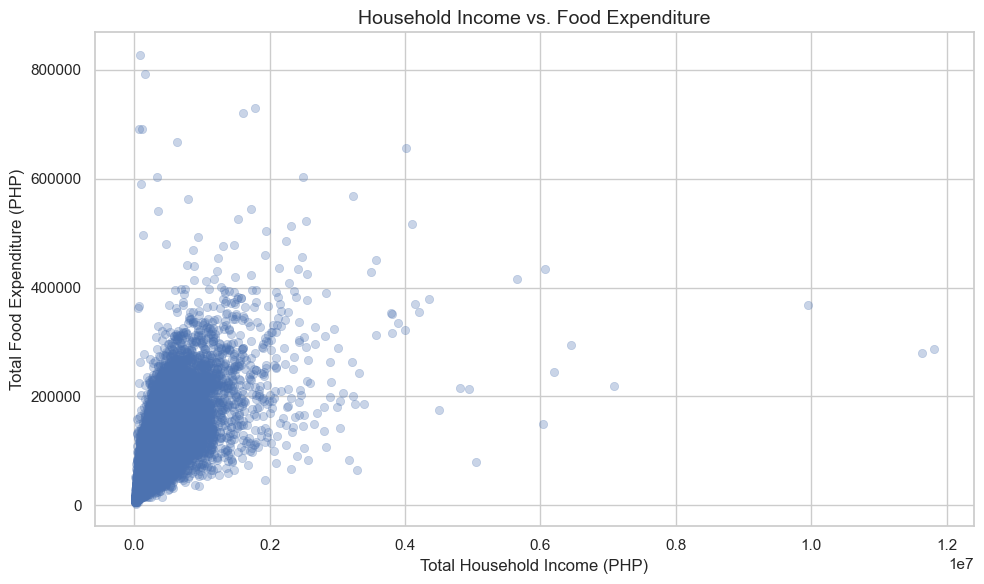

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fam, x='Total Household Income', y='Total Food Expenditure', alpha=0.3, edgecolor=None)
plt.title('Household Income vs. Food Expenditure', fontsize=14)
plt.xlabel('Total Household Income (PHP)', fontsize=12)
plt.ylabel('Total Food Expenditure (PHP)', fontsize=12)
plt.tight_layout()
plt.show()


<h2>Insight 1:
Food consistently ranks as the top median household expense, indicating that food is the primary budget priority regardless of income.</h2>

<h1> Analysis 2. What is the distribution of total food expenditure among households?</h1>


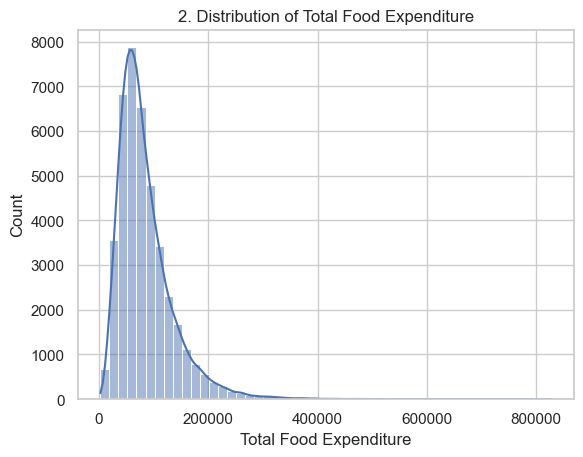

In [7]:
sns.histplot(fam["Total Food Expenditure"], bins=50, kde=True)
plt.title("2. Distribution of Total Food Expenditure")
plt.show()


<h2> Insight 2: Most households spend less than 150,000 PHP/year on food.</h2>

<h1> Analysis 3. Is there a correlation between total household income and food expenditure?</h1>


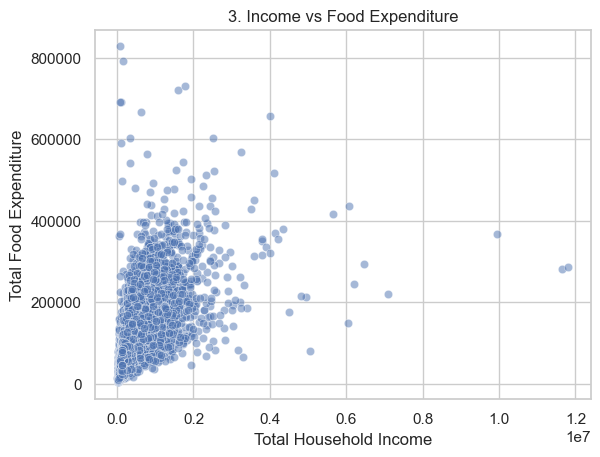

In [8]:
sns.scatterplot(x="Total Household Income", y="Total Food Expenditure", data=fam, alpha=0.5)
plt.title("3. Income vs Food Expenditure")
plt.show()


<h2> Insight 3: Food spending increases with income, showing a positive correlation.</h2>

<h1>Analysis 4.What can we learn from the correlation between different household features?</h1>



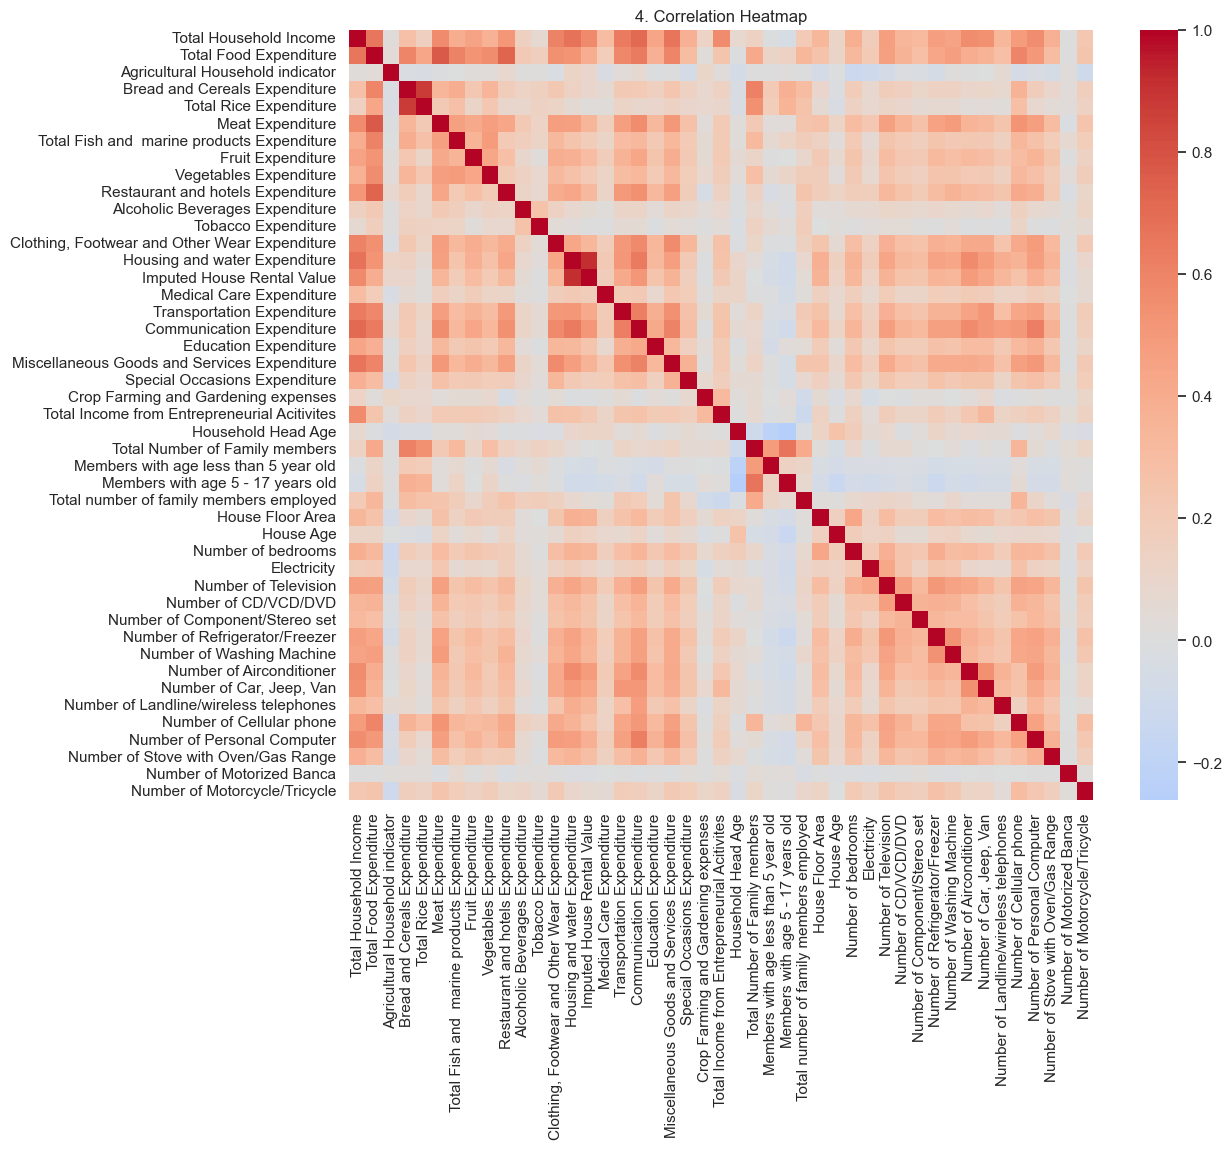

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(fam.select_dtypes(include='number').corr(), cmap='coolwarm', center=0)
plt.title("4. Correlation Heatmap")
plt.show()


<h2> Insight 4: Income is strongly linked to spending patterns—households with higher income tend to spend more across multiple categories, particularly housing and education.</h2>

<h1> Analysis 5. How does household income vary across different regions?
</h1>

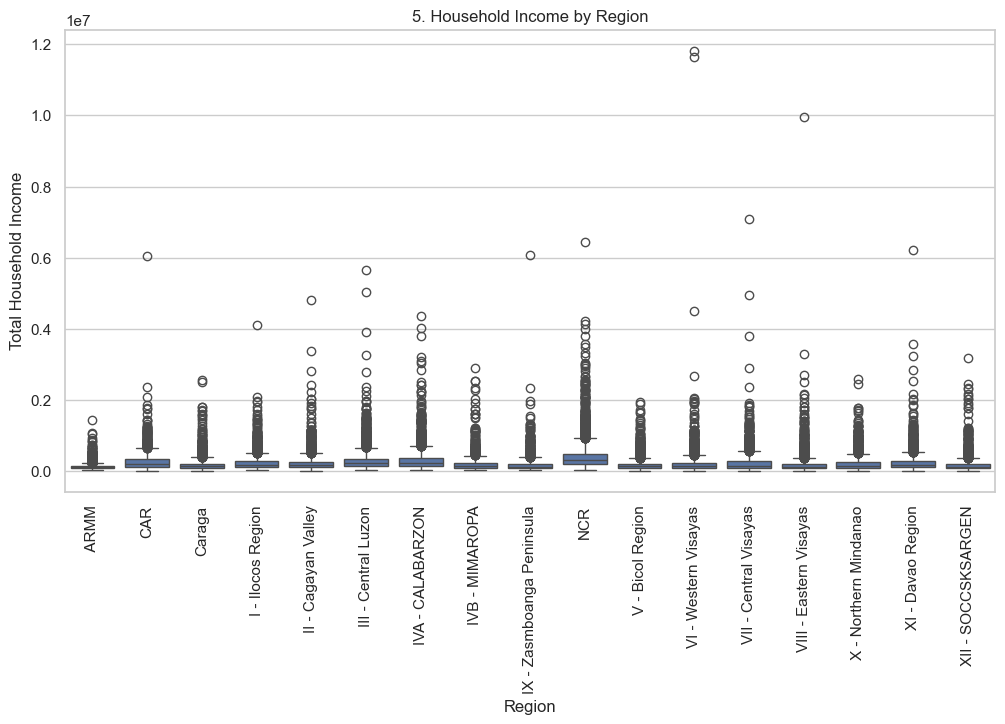

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=fam, x='Region', y='Total Household Income')
plt.xticks(rotation=90)
plt.title("5. Household Income by Region")
plt.show()

<h2> Insight 5: NCR and CALABARZON show higher income distributions</h2>

<h1>Analysis 6 – How does educational attainment of the household head influence income?
</h1>

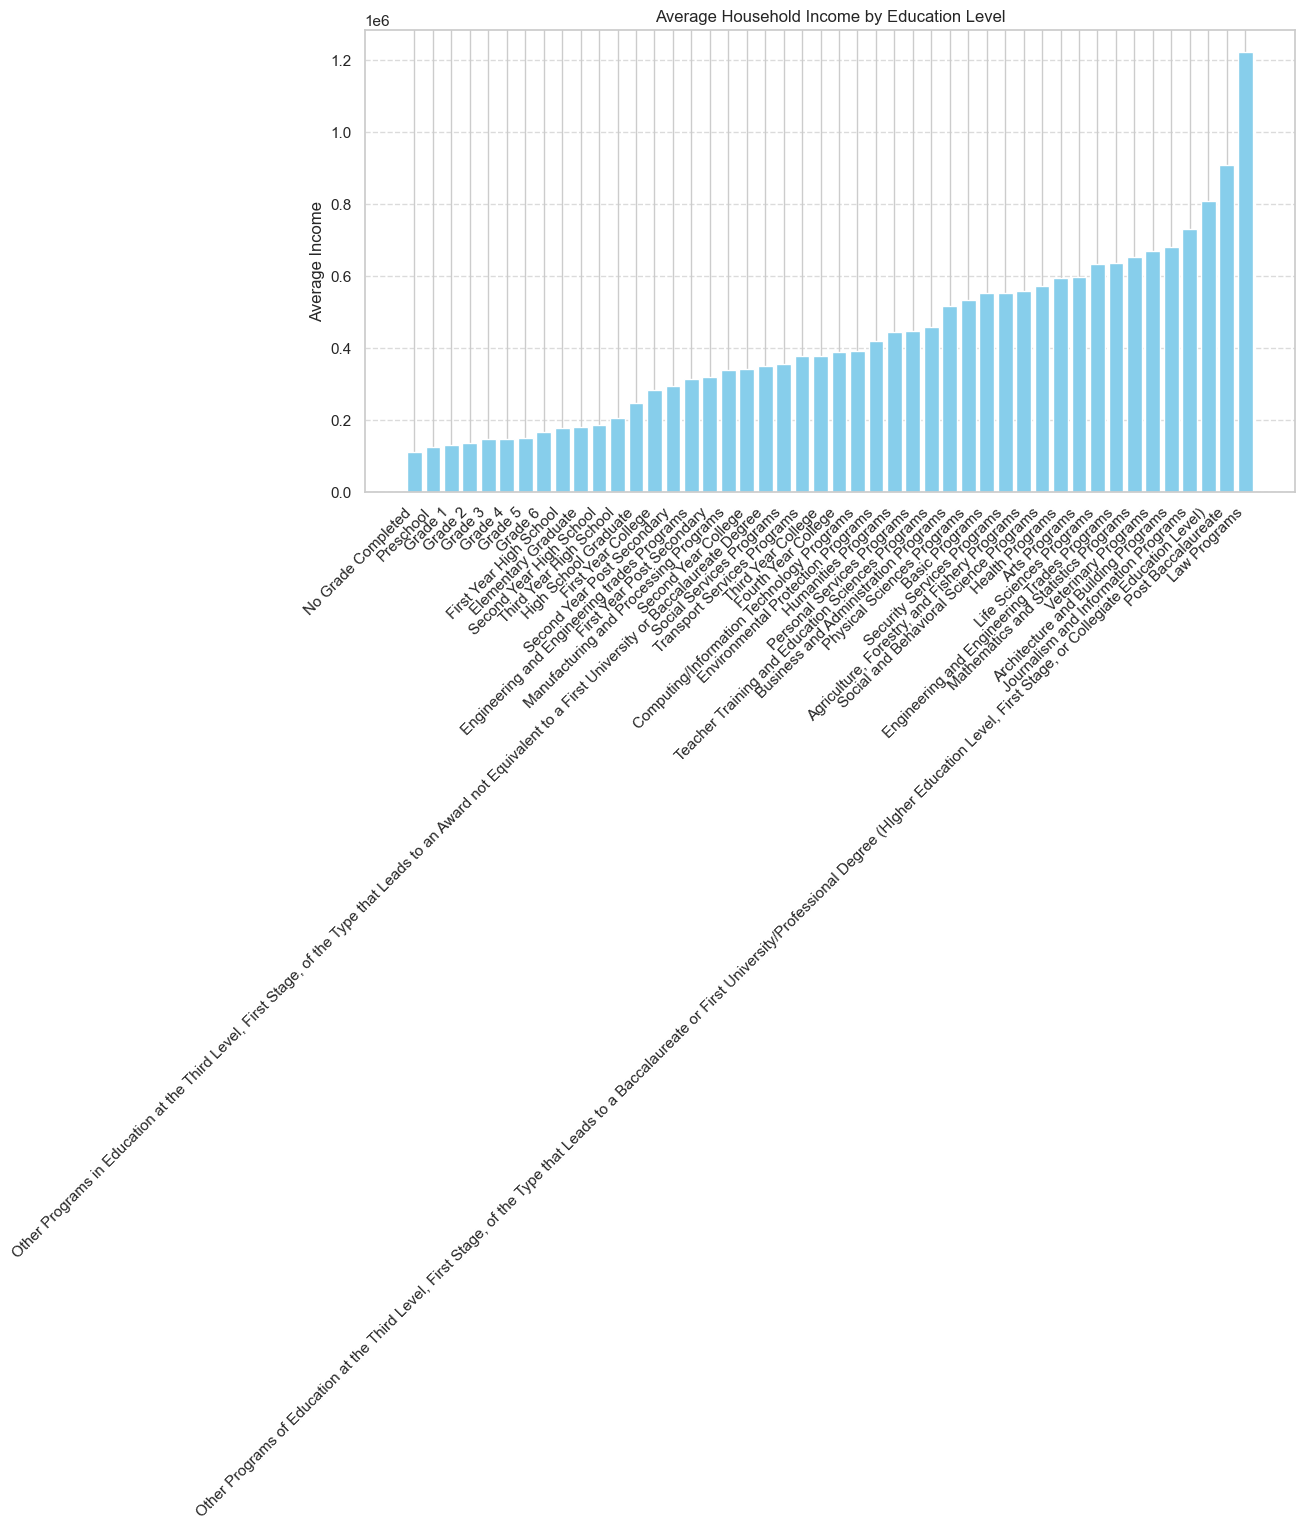

In [11]:
edu_income = fam.groupby("Household Head Highest Grade Completed")["Total Household Income"].mean().sort_values()

plt.figure(figsize=(12, 6))
plt.bar(edu_income.index, edu_income.values, color='skyblue')
plt.title("Average Household Income by Education Level")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Income")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<h2> Insight 6:
 Higher educational attainment of the household head is strongly associated with higher household income.
</h2>

<h1>Analysis 7 – What is the relationship between housing tenure and household income?


</h1>

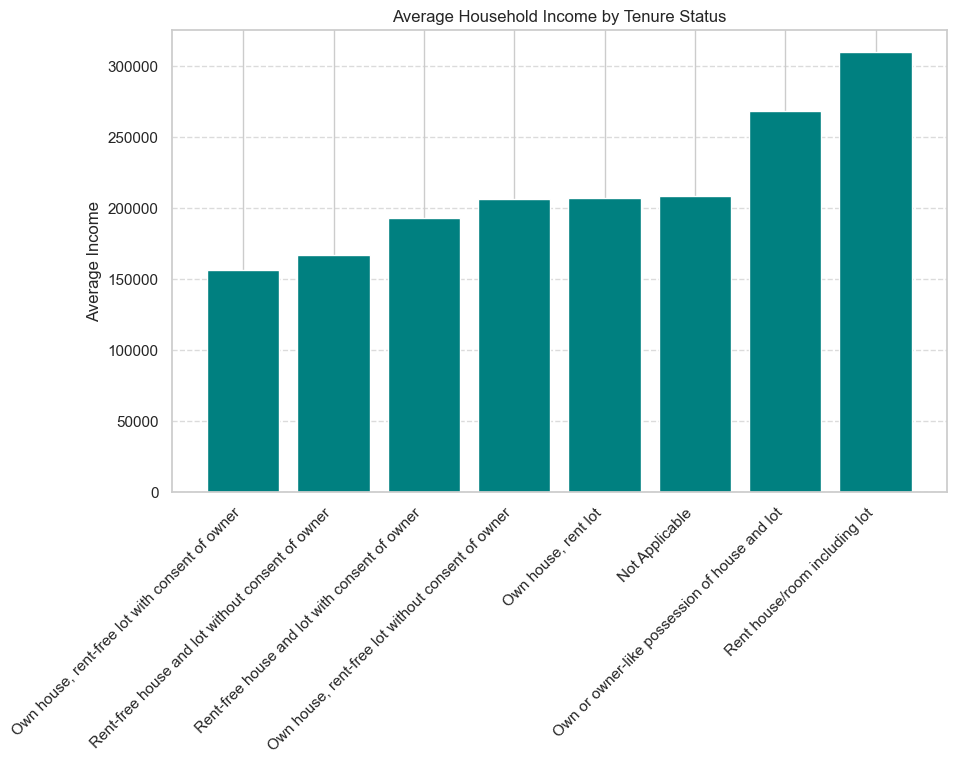

In [12]:
tenure_income = fam.groupby("Tenure Status")["Total Household Income"].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.bar(tenure_income.index, tenure_income.values, color='teal')
plt.title("Average Household Income by Tenure Status")
plt.ylabel("Average Income")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h2> Insight 7:
Households that own their home or occupy rent-free tend to have higher average income.
</h2>

<h1>Analysis 8 – Does the age of the household head affect total household expenditure?
</h1>

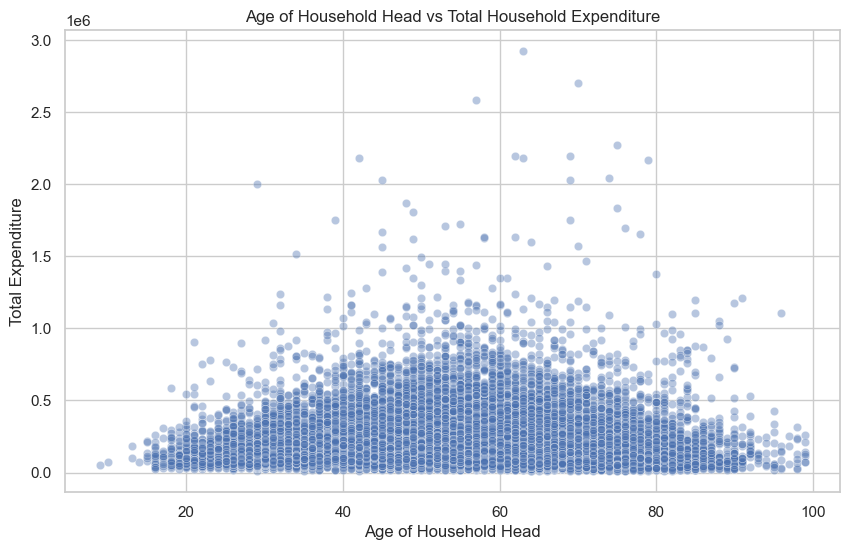

In [13]:

fam["Total Household Expenditure"] = fam[[
    "Total Food Expenditure", "Clothing, Footwear and Other Wear Expenditure",
    "Housing and water Expenditure", "Medical Care Expenditure", "Transportation Expenditure",
    "Communication Expenditure", "Education Expenditure", "Miscellaneous Goods and Services Expenditure"
]].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Household Head Age", y="Total Household Expenditure", data=fam, alpha=0.4)
plt.title("Age of Household Head vs Total Household Expenditure")
plt.xlabel("Age of Household Head")
plt.ylabel("Total Expenditure")
plt.grid(True)
plt.show()



<h2> Insight 8:
 Spending increases with age up to a point, then stabilizes—indicating economic maturity or retirement.
</h2>

<h1>Analysis 9 –  Do agricultural households spend more on food than non-agricultural ones?
</h1>

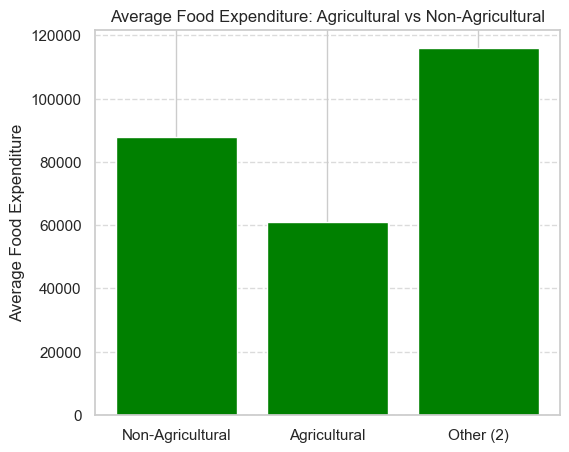

In [14]:

# Group and compute average food expenditure
agr_food = fam.groupby("Agricultural Household indicator")["Total Food Expenditure"].mean()

# Convert index to readable labels
labels = ['Non-Agricultural' if i == 0 else 'Agricultural' if i == 1 else f'Other ({i})' for i in agr_food.index]

# Plot
plt.figure(figsize=(6, 5))
plt.bar(labels, agr_food.values, color='green')
plt.title("Average Food Expenditure: Agricultural vs Non-Agricultural")
plt.ylabel("Average Food Expenditure")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




<h2> Insight 9:
 Agricultural households generally spend more on food—possibly due to larger family sizes or limited access to non-homegrown goods.
</h2>

<h1>Analysis 10 –  Is there a relationship between communication and education spending?
</h1>

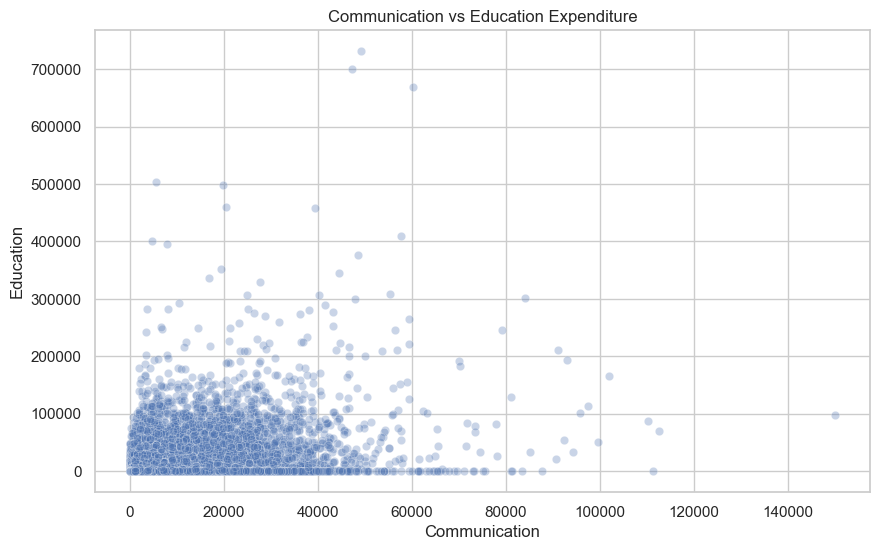

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Communication Expenditure", y="Education Expenditure", data=fam, alpha=0.3)
plt.title("Communication vs Education Expenditure")
plt.xlabel("Communication")
plt.ylabel("Education")
plt.grid(True)
plt.show()



<h2> Insight 10:
 A mild positive correlation suggests tech-savvy households may also invest in education.
</h2>

<h1>Analysis 11 –How unequal is household income across regions?


</h1>

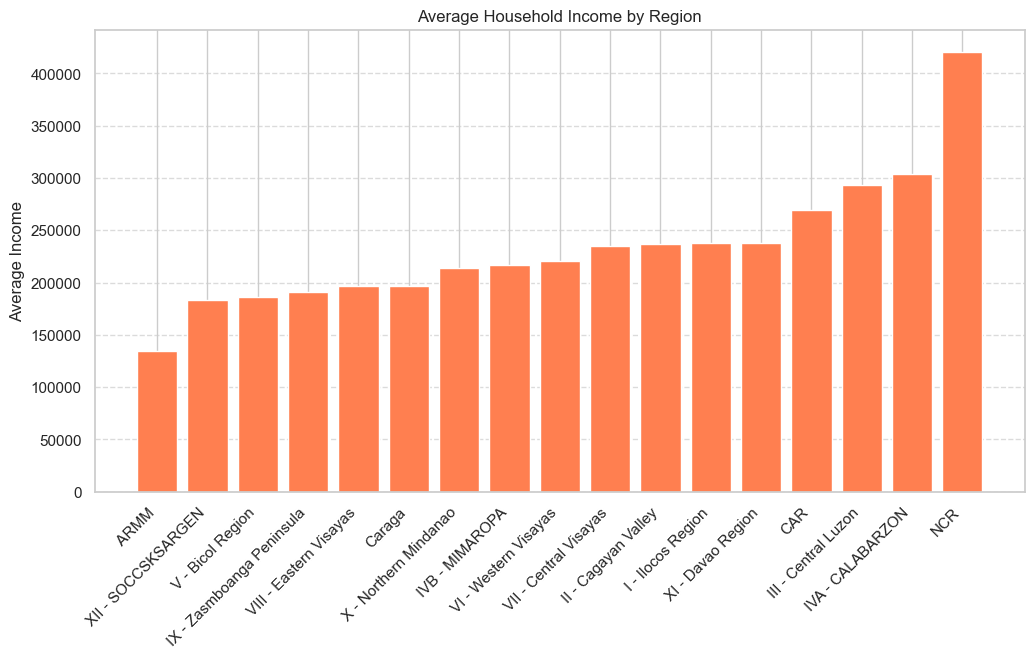

In [16]:

region_income = fam.groupby("Region")["Total Household Income"].mean().sort_values()

plt.figure(figsize=(12, 6))
plt.bar(region_income.index, region_income.values, color='coral')
plt.title("Average Household Income by Region")
plt.ylabel("Average Income")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<h2>Insight 11:
 Metro regions like NCR consistently report the highest household incomes, reflecting urban-rural income disparity.
</h2>

<h1>Analysis 12 – Does the type of house wall reflect household income levels?</h1>


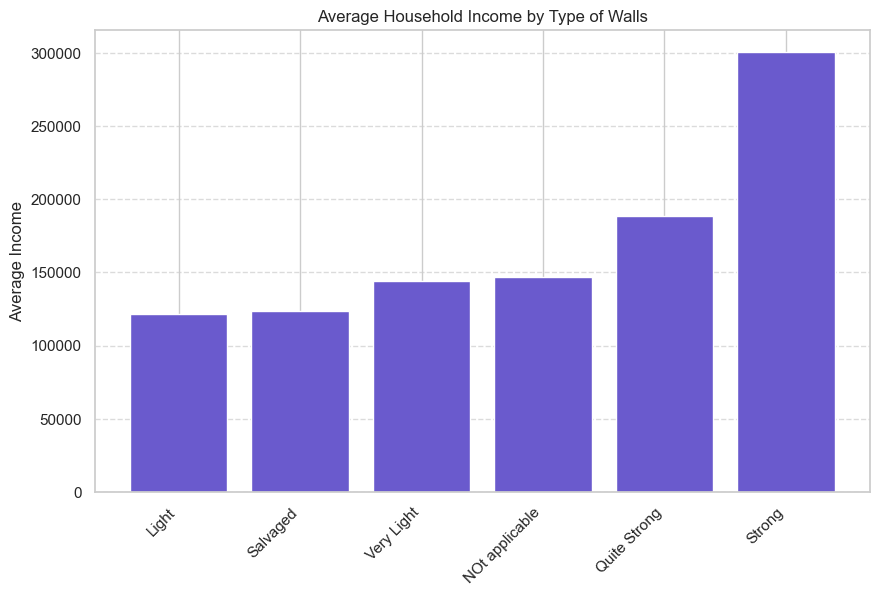

In [17]:
wall_income = fam.groupby("Type of Walls")["Total Household Income"].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.bar(wall_income.index, wall_income.values, color='slateblue')
plt.title("Average Household Income by Type of Walls")
plt.ylabel("Average Income")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<h2>Insight 12:
 Concrete or brick walls are associated with higher income, while light or makeshift walls correlate with poverty.
    </h2>

<h1>Analysis 13 – How does refrigerator ownership relate to income?</h1>


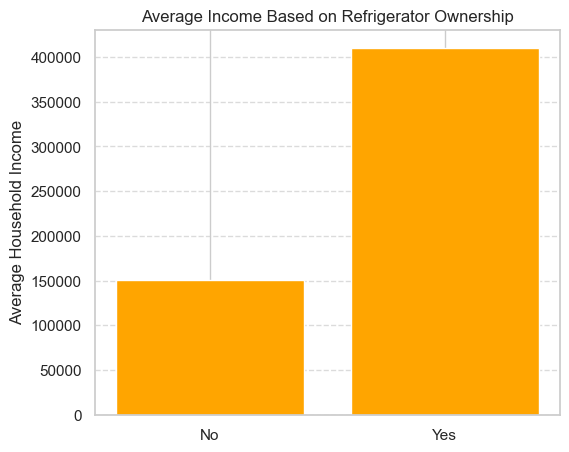

In [18]:
fam["Owns Refrigerator"] = fam["Number of Refrigerator/Freezer"] > 0
refrig_income = fam.groupby("Owns Refrigerator")["Total Household Income"].mean()

plt.figure(figsize=(6, 5))
plt.bar(["No", "Yes"], refrig_income.values, color='orange')
plt.title("Average Income Based on Refrigerator Ownership")
plt.ylabel("Average Household Income")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<h2>Insight 13:
 Refrigerator ownership is a proxy indicator of household wealth and access to consistent electricity.
</h2>

<h1>Analysis 14 – Is access to improved toilet facilities linked to higher income?</h1>


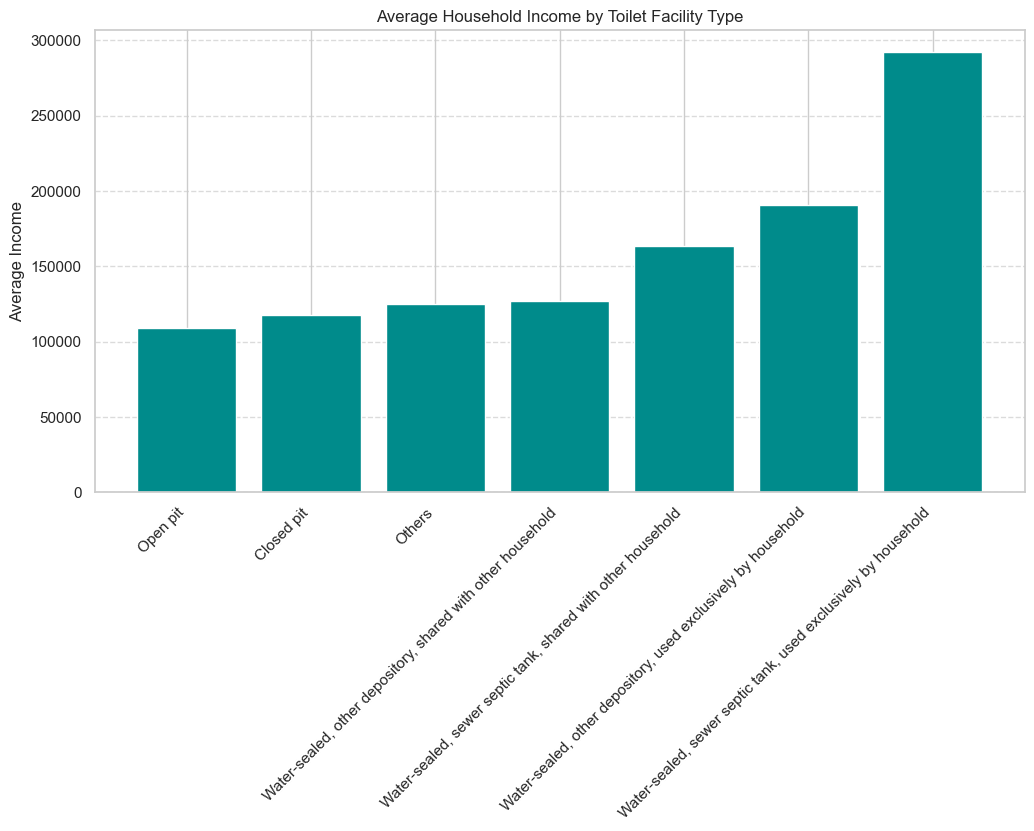

In [19]:

toilet_income = fam.groupby("Toilet Facilities")["Total Household Income"].mean().sort_values()

plt.figure(figsize=(12, 6))
plt.bar(toilet_income.index, toilet_income.values, color='darkcyan')
plt.title("Average Household Income by Toilet Facility Type")
plt.ylabel("Average Income")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<h2>Insight 14:
 Households with water-sealed, flush-type toilets report significantly higher income levels.
</h2>

<h1>Analysis 15 –  Does motor vehicle ownership indicate higher household income?</h1>


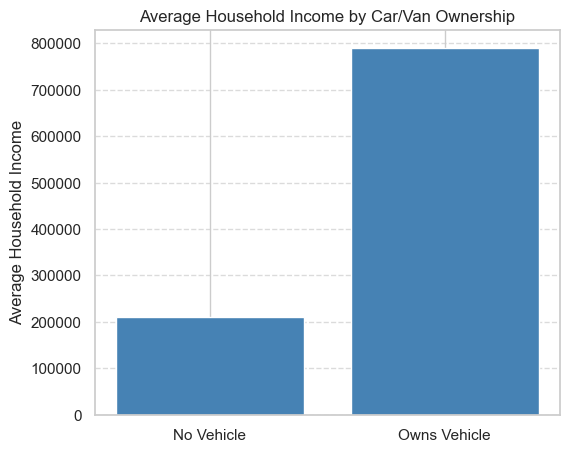

In [20]:

fam["Owns Vehicle"] = fam["Number of Car, Jeep, Van"] > 0
vehicle_income = fam.groupby("Owns Vehicle")["Total Household Income"].mean()

plt.figure(figsize=(6, 5))
plt.bar(["No Vehicle", "Owns Vehicle"], vehicle_income.values, color='steelblue')
plt.title("Average Household Income by Car/Van Ownership")
plt.ylabel("Average Household Income")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<h2>Insight 15:
 Owning a motor vehicle strongly correlates with higher household income and mobility access.
</h2>

<h1>Analysis 16 How is digital access and appliance ownership correlated with income?</h1>


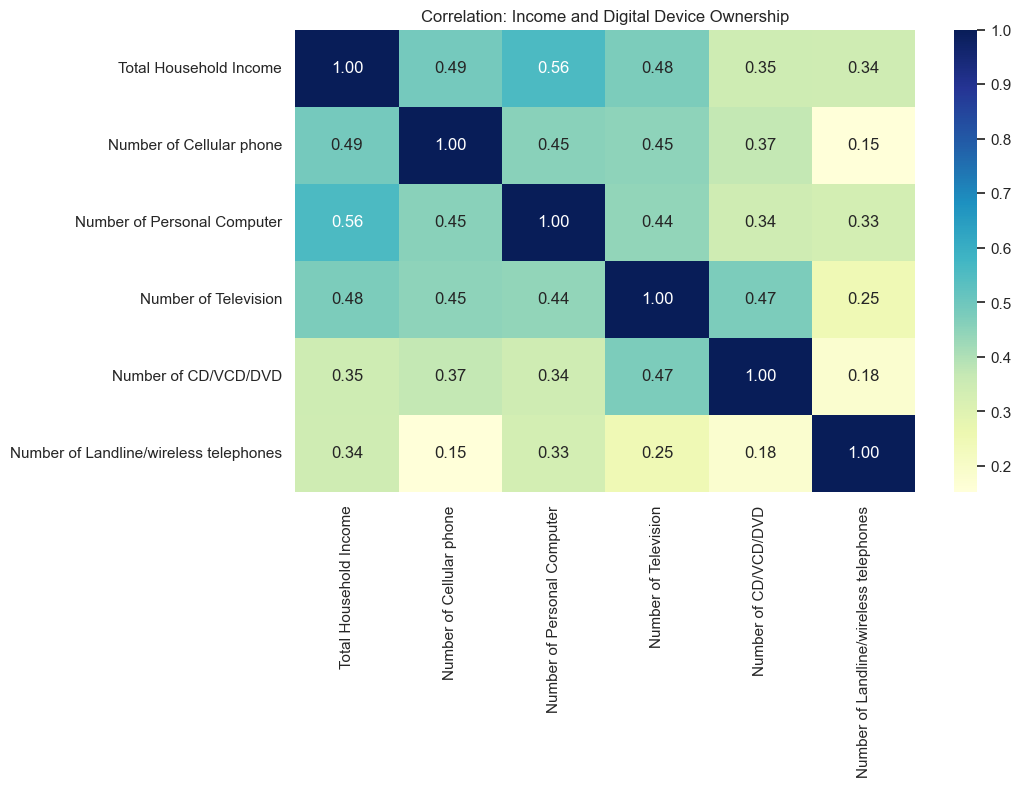

In [21]:
digital_ownership = fam[[
    "Total Household Income",
    "Number of Cellular phone",
    "Number of Personal Computer",
    "Number of Television",
    "Number of CD/VCD/DVD",
    "Number of Landline/wireless telephones"
]]

plt.figure(figsize=(10, 6))
sns.heatmap(digital_ownership.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation: Income and Digital Device Ownership")
plt.show()



<h2> Insight 16:
 Income has the strongest correlation with computer ownership, while ownership of TVs and mobile phones also increases as income rises—demonstrating digital access as a key indicator of affluence.
</h2>

<h1>Analysis 17  How do age, education, and income influence medical care spending?</h1>


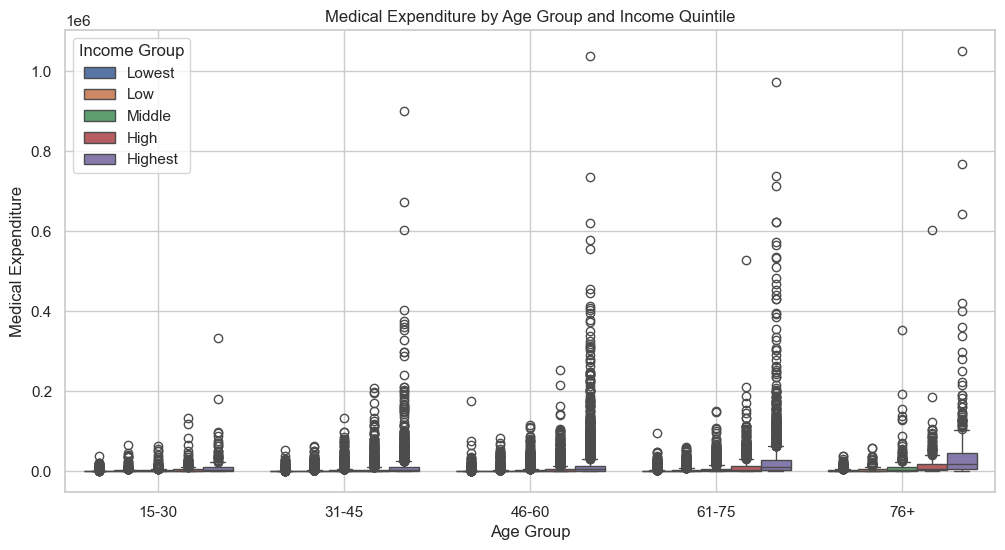

In [22]:

# Recompute the Income Group
fam["Income Group"] = pd.qcut(fam["Total Household Income"], q=5, labels=["Lowest", "Low", "Middle", "High", "Highest"])

# Create age group buckets
fam["Age Group"] = pd.cut(
    fam["Household Head Age"],
    bins=[15, 30, 45, 60, 75, 100],
    labels=["15-30", "31-45", "46-60", "61-75", "76+"]
)

# Plot the multivariate boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Age Group", y="Medical Care Expenditure", hue="Income Group", data=fam)
plt.title("Medical Expenditure by Age Group and Income Quintile")
plt.ylabel("Medical Expenditure")
plt.grid(True)
plt.show()



<h2> Insight 17:
 Medical spending increases with age, but higher-income groups spend significantly more at all age levels.
</h2>

<h1>Analysis 18 What is the relationship between house size, age, and household income?</h1>


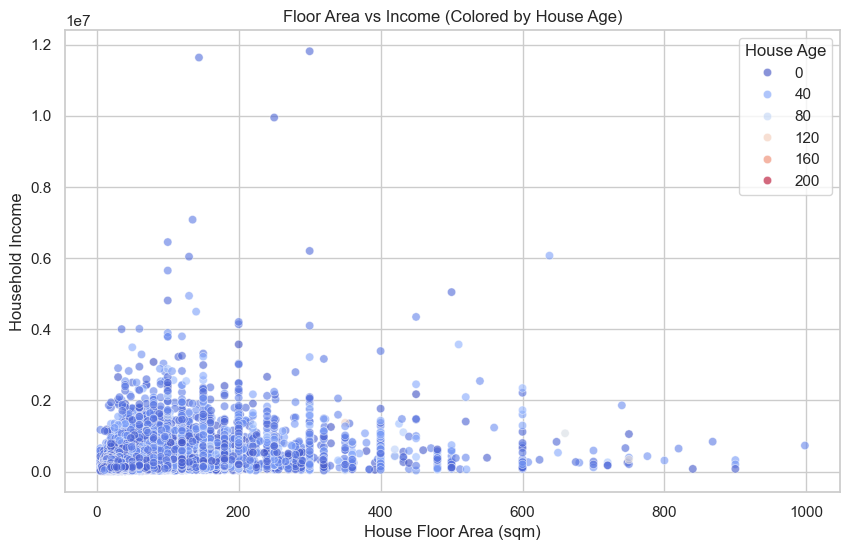

In [23]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=fam, x="House Floor Area", y="Total Household Income", hue="House Age", palette="coolwarm", alpha=0.6)
plt.title("Floor Area vs Income (Colored by House Age)")
plt.xlabel("House Floor Area (sqm)")
plt.ylabel("Household Income")
plt.grid(True)
plt.show()



<h2> Insight 18:
 Newer and larger houses are associated with significantly higher household income. Older small homes concentrate in lower-income groups.
</h2>

<h1> Analysis 19 How does media device ownership vary by region and income group?
</h1>

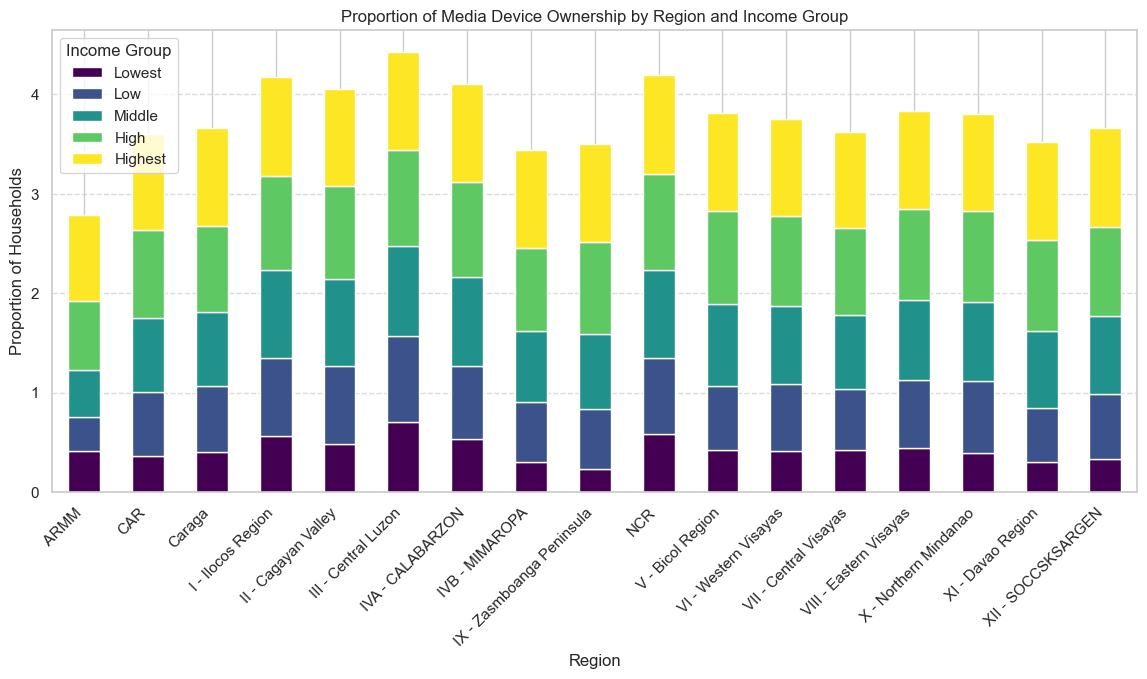

In [24]:
fam["Owns Media Devices"] = (fam["Number of Television"] > 0) | (fam["Number of CD/VCD/DVD"] > 0)
media_device_count = fam.groupby(["Region", "Income Group"])["Owns Media Devices"].mean().unstack()

media_device_count.plot(kind='bar', stacked=True, figsize=(14, 6), colormap="viridis")
plt.title("Proportion of Media Device Ownership by Region and Income Group")
plt.ylabel("Proportion of Households")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Income Group")
plt.show()

<h2>Insight 19:
Media device ownership is nearly universal in top income groups across all regions but significantly lower in the lowest income brackets in rural regions.
</h2>

<h1>Analysis 20 What is the connection between electricity access, education, and income?</h1>


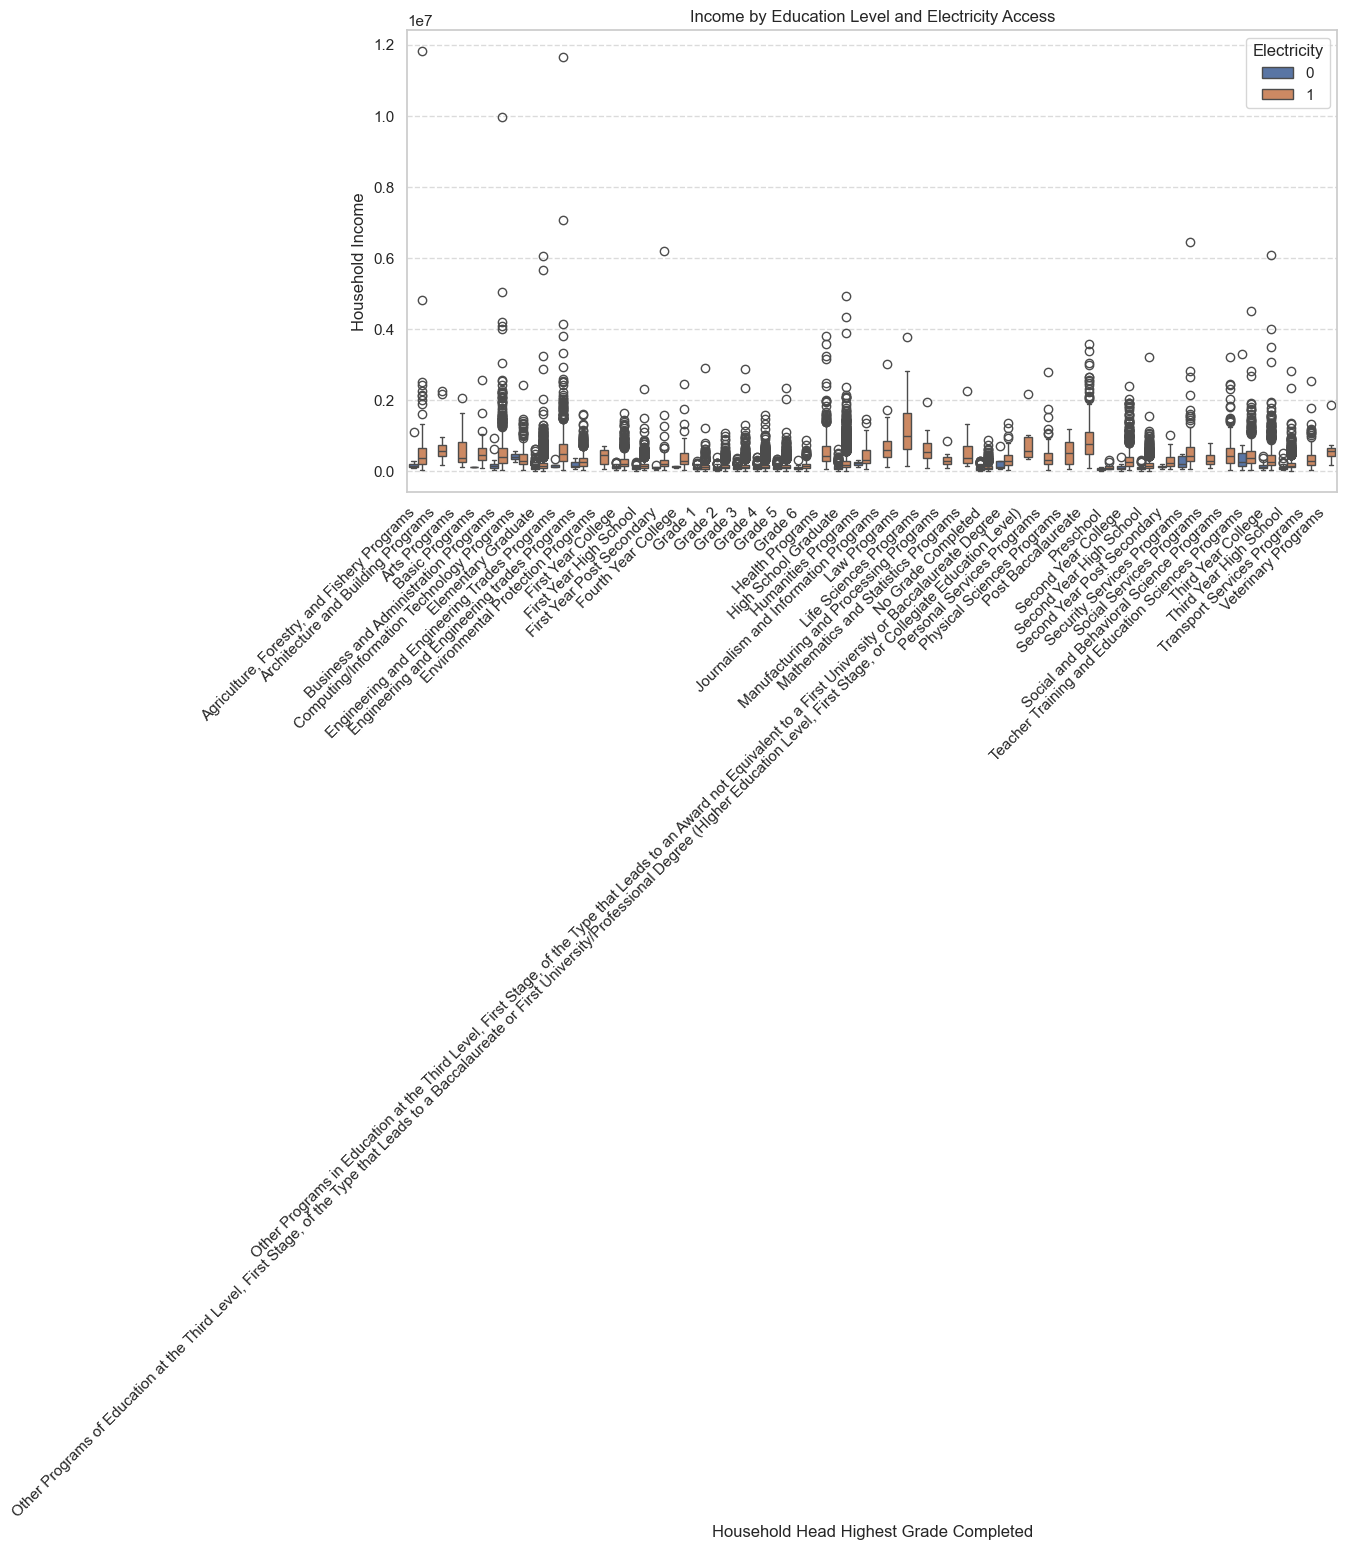

In [25]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=fam, x="Household Head Highest Grade Completed", y="Total Household Income", hue="Electricity")
plt.title("Income by Education Level and Electricity Access")
plt.ylabel("Household Income")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2>Insight 20:
Among all education levels, those with electricity access consistently earn more—emphasizing energy access as a driver of opportunity.</h2>